# Load

In [1]:
!pip install opendatasets

In [2]:
import opendatasets as od
import os

In [3]:
cd C:\Users\ASUS RYZEN\AnacondaJupyter\ML_Praktikum\Modul5

C:\Users\ASUS RYZEN\AnacondaJupyter\ML_Praktikum\Modul5


In [4]:
{"username":"huseinabdulh","key":"e953505bd13b6491beac8d1916f15533"}

{'username': 'huseinabdulh', 'key': 'e953505bd13b6491beac8d1916f15533'}

In [5]:
'''od.download('https://www.kaggle.com/tawsifurrahman/tuberculosis-tb-chest-xray-dataset')'''

"od.download('https://www.kaggle.com/tawsifurrahman/tuberculosis-tb-chest-xray-dataset')"

In [6]:
import os
base_dataset = 'C:/Users/ASUS RYZEN/AnacondaJupyter/ML_Praktikum/Modul5/tuberculosis-tb-chest-xray-dataset/TB_Chest_Radiography_Database'
class_dir = ['Normal','Tuberculosis']
for class_item in class_dir:
  cur_dir = base_dataset+"/"+class_item
  
  dataset = os.listdir(cur_dir)
  for item in dataset:
    if not item.endswith(".png"):
        os.remove(os.path.join(cur_dir, item))

In [7]:
dataset_awal ='C:/Users/ASUS RYZEN/AnacondaJupyter/ML_Praktikum/Modul5/tuberculosis-tb-chest-xray-dataset/TB_Chest_Radiography_Database'


print('Number of classes: {}'.format(len(os.listdir(dataset_awal))))

print('')

normal = len(os.listdir(dataset_awal+'/Normal'))
tbc= len(os.listdir(dataset_awal+'/Tuberculosis'))

print("DATASET AWAL ")
print('Normal : ', normal)
print('TBC : ', tbc)

Number of classes: 2

DATASET AWAL 
Normal :  3500
TBC :  700


In [8]:
pip install split-folders

Note: you may need to restart the kernel to use updated packages.


'C:\Users\ASUS' is not recognized as an internal or external command,
operable program or batch file.


In [9]:
'''import splitfolders

base_dir="C:/Users/ASUS RYZEN/AnacondaJupyter/ML_Praktikum/Modul5/tuberculosis-tb-chest-xray-dataset/TB_Chest_Radiography_Database"
data_dir="C:/Users/ASUS RYZEN/AnacondaJupyter/ML_Praktikum/Modul5/tuberculosis-tb-chest-xray-dataset/TB_Chest_Radiography_Database_splitted"
splitfolders.ratio(base_dir, output=data_dir, seed=1337, ratio=(.8 ,.1 ,.1),group_prefix=None)'''

'import splitfolders\n\nbase_dir="C:/Users/ASUS RYZEN/AnacondaJupyter/ML_Praktikum/Modul5/tuberculosis-tb-chest-xray-dataset/TB_Chest_Radiography_Database"\ndata_dir="C:/Users/ASUS RYZEN/AnacondaJupyter/ML_Praktikum/Modul5/tuberculosis-tb-chest-xray-dataset/TB_Chest_Radiography_Database_splitted"\nsplitfolders.ratio(base_dir, output=data_dir, seed=1337, ratio=(.8 ,.1 ,.1),group_prefix=None)'

In [10]:
#Define a path
base_dir = 'C:/Users/ASUS RYZEN/AnacondaJupyter/ML_Praktikum/Modul5/tuberculosis-tb-chest-xray-dataset/TB_Chest_Radiography_Database_splitted'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')

train_normal_dir = os.path.join(train_dir, 'Normal')
train_tuber_dir = os.path.join(train_dir, 'Tuberculosis')

validation_normal_dir = os.path.join(validation_dir, 'Normal')
validation_tuber_dir = os.path.join(validation_dir, 'Tuberculosis')

test_normal_dir = os.path.join(test_dir, 'Normal')
test_tuber_dir = os.path.join(test_dir, 'Tuberculosis')

In [11]:
print('Jumlah data train normal :', len(os.listdir(train_normal_dir)))
print('Jumlah data train tuber :',len(os.listdir(train_tuber_dir)))
print()
print('Jumlah data validation normal  :',len(os.listdir(validation_normal_dir)))
print('Jumlah data validation tuber :',len(os.listdir(validation_tuber_dir)))
print('')
print('Jumlah data test normal  :',len(os.listdir(test_normal_dir)))
print('Jumlah data test puber :',len(os.listdir(test_tuber_dir)))

Jumlah data train normal : 2800
Jumlah data train tuber : 560

Jumlah data validation normal  : 350
Jumlah data validation tuber : 70

Jumlah data test normal  : 350
Jumlah data test puber : 70


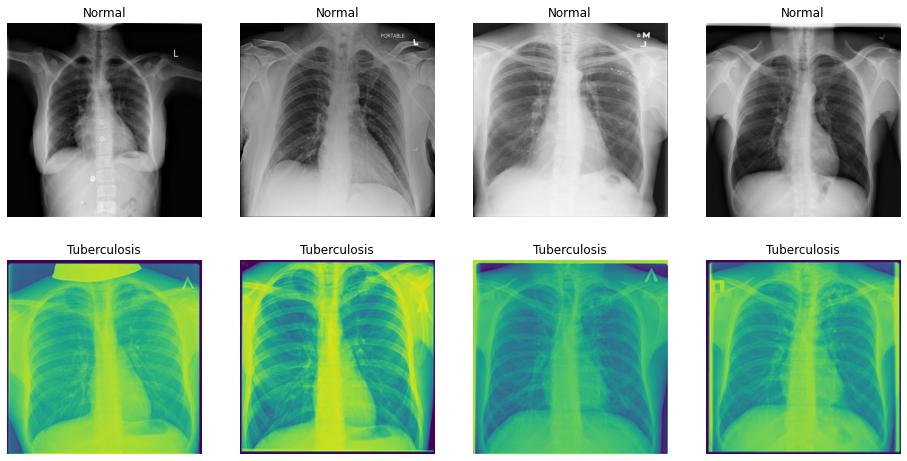

In [12]:
# Tampilkan 8 image per kelas dengan ukuran 4x4 
#pip install matplotlib
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

nrows = 2
ncols = 4

pic_index = 0

fig = plt.gcf()
fig.set_size_inches( ncols * 4,nrows * 4)

pic_index += 8
normal_img = [os.path.join(train_normal_dir, fname) 
                for fname in os.listdir(train_normal_dir)[pic_index-4:pic_index]]
tuberculosis_img  = [os.path.join(train_tuber_dir, fname) 
                for fname in os.listdir(train_tuber_dir)[pic_index-4:pic_index]]

for i, img_path in enumerate(normal_img+tuberculosis_img):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.title(img_path.split(os.path.sep)[-2])

plt.show()

# Preprocessing

In [13]:
!pip3 install keras
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator
import cv2
import numpy as np
import random

In [14]:
TRAINING_DIR = "C:/Users/ASUS RYZEN/AnacondaJupyter/ML_Praktikum/Modul5/tuberculosis-tb-chest-xray-dataset/TB_Chest_Radiography_Database_splitted/train"
VALIDATION_DIR = "C:/Users/ASUS RYZEN/AnacondaJupyter/ML_Praktikum/Modul5/tuberculosis-tb-chest-xray-dataset/TB_Chest_Radiography_Database_splitted/val"
TEST_DIR = "C:/Users/ASUS RYZEN/AnacondaJupyter/ML_Praktikum/Modul5/tuberculosis-tb-chest-xray-dataset/TB_Chest_Radiography_Database_splitted/test"

# Preprocessing Khusus Noise

In [15]:
def add_noise(img):
    '''Add random noise to an image'''
    VARIABILITY = 50
    deviation = VARIABILITY*random.random()
    noise = np.random.normal(0, deviation, img.shape)
    img += noise
    np.clip(img, 0., 255.)
    return img

In [16]:
#Testing Generator Both
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      #shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      preprocessing_function=add_noise,
      fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        TRAINING_DIR,
        target_size=(100, 100),
        batch_size=32,
        class_mode='categorical')

validation_generator = validation_datagen.flow_from_directory(
        VALIDATION_DIR,
        target_size=(100, 100),
        batch_size=32,
        class_mode='categorical')


test_generator = validation_datagen.flow_from_directory(
    TEST_DIR,
    target_size=(100, 100),
    batch_size=32,
    class_mode='categorical')


Found 3360 images belonging to 2 classes.
Found 420 images belonging to 2 classes.
Found 420 images belonging to 2 classes.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


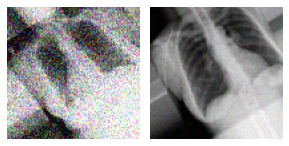

In [18]:
#tampilkan Data Generator Khusus add_noise
import matplotlib.pyplot as plt
plt.figure(figsize = (20, 15))
for i in range(2):
    plt.subplot(5, 10, i + 1)
    
    for X, y in train_generator:

        plt.imshow(X[0])
        plt.axis("off")
        break
        
plt.tight_layout()
plt.show()

# Modelling

https://www.tensorflow.org/api_docs/python/tf/keras/applications

In [34]:
# IMPORT SEMUA PAKET YANG ANDA PERLUKAN UNTUK MENDEFINISIKAN MODEL DISINI
from tensorflow.keras.layers import Input, Flatten, Concatenate, Dropout, Dense, InputLayer, Conv2D, MaxPool2D, BatchNormalization, Dropout
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [35]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

In [37]:
baseModel_InceptionV3 = InceptionV3(input_shape = (100,100,3),
                           include_top = False,
                           weights = "imagenet")

for layer in baseModel_InceptionV3 .layers:
    layer._name = layer._name + str('_InceptionV3')
    layer.trainable = False
    
# Feature Extraction Layer
model = Sequential()
model.add(InputLayer(input_shape=(100,100,3)))
model.add(Conv2D(filters=8, kernel_size=3, strides=1,  padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=2, padding='same'))
model.add(Conv2D(filters=16, kernel_size=3, strides=1,  padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=2, padding='same'))
model.add(Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=2, padding='same'))
model.add(Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=2, padding='same'))
model.add(Conv2D(filters=128, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=2, padding='same'))

inp = Input((100,100,3))

inceptionv3_x = Flatten()(baseModel_InceptionV3(inp))
model = Flatten()(model(inp))

ensemble_model = Concatenate()([inceptionv3_x , model ])

output = Flatten()(ensemble_model)
output = Dense(128, activation='relu')(output)
output = Dropout(0.4)(output)
output = BatchNormalization()(output)
output = Dense(2, activation='softmax')(output)

model = Model(inp, output)
print(model.summary())

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_13 (InputLayer)           [(None, 100, 100, 3) 0                                            
__________________________________________________________________________________________________
inception_v3 (Functional)       (None, 1, 1, 2048)   21802784    input_13[0][0]                   
__________________________________________________________________________________________________
sequential_5 (Sequential)       (None, 4, 4, 128)    99376       input_13[0][0]                   
__________________________________________________________________________________________________
flatten_3 (Flatten)             (None, 2048)         0           inception_v3[0][0]               
____________________________________________________________________________________________

In [39]:
from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(lr=1e-3,decay=0.0001/16),
              loss='categorical_crossentropy',
              metrics=['acc']
)

In [40]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

early_stop_val_acc = EarlyStopping(monitor='val_acc',
                          patience=10,
                          verbose=1,
                          mode='max',
                          restore_best_weights=True
                          )

In [41]:
H = model.fit(train_generator,
              epochs=150,
              steps_per_epoch=10,  # images = batch_size * steps
              validation_data=validation_generator,
              callbacks=early_stop_val_acc 
             )

Epoch 1/150
10/10 [==============================] - 30s 2s/step - loss: 0.8923 - acc: 0.6099 - val_loss: 0.4712 - val_acc: 0.8357
Epoch 2/150
10/10 [==============================] - 17s 2s/step - loss: 0.5702 - acc: 0.7231 - val_loss: 0.2923 - val_acc: 0.8857
Epoch 3/150
10/10 [==============================] - 17s 2s/step - loss: 0.3703 - acc: 0.8424 - val_loss: 0.4201 - val_acc: 0.7976
Epoch 4/150
10/10 [==============================] - 16s 2s/step - loss: 0.4891 - acc: 0.8042 - val_loss: 0.4773 - val_acc: 0.7643
Epoch 5/150
10/10 [==============================] - 17s 2s/step - loss: 0.4422 - acc: 0.8153 - val_loss: 0.3768 - val_acc: 0.8357
Epoch 6/150
10/10 [==============================] - 16s 2s/step - loss: 0.4189 - acc: 0.8615 - val_loss: 0.6955 - val_acc: 0.5881
Epoch 7/150
10/10 [==============================] - 16s 2s/step - loss: 0.4786 - acc: 0.8266 - val_loss: 0.5441 - val_acc: 0.7262
Epoch 8/150
10/10 [==============================] - 15s 2s/step - loss: 0.2264 - a

# SavedModel

In [42]:
import json

save_dir = 'C:/Users/ASUS RYZEN/AnacondaJupyter/ML_Praktikum/Modul5/Saved_Model'

json.dump(H.history, open(save_dir + '/V2_InceptionV3_WFeatureExtractionFixed.json', 'w'))

In [43]:
import tensorflow as tf

# Convert the model.
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
    
# Save the model.
save_tflite_dir = save_dir + '/V2_InceptionV3_WFeatureExtractionFixed.tflite'
with open(save_tflite_dir, 'wb') as f:
    f.write(tflite_model)

# LoadTFLite

In [44]:
import numpy as np
import tensorflow as tf

# Load the TFLite model and allocate tensors.
interpreter = tf.lite.Interpreter(model_path=save_tflite_dir)
interpreter.allocate_tensors()

# Get input and output tensors.
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Test the model on random input data.
input_shape = input_details[0]['shape']
input_data = np.array(np.random.random_sample(input_shape), dtype=np.float32)
interpreter.set_tensor(input_details[0]['index'], input_data)

interpreter.invoke()

# The function `get_tensor()` returns a copy of the tensor data.
# Use `tensor()` in order to get a pointer to the tensor.
output_data = interpreter.get_tensor(output_details[0]['index'])
print(np.argmax(output_data))
print(np.max(output_data))

1
0.8023907


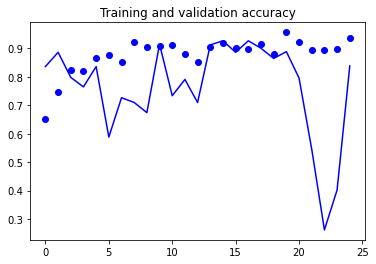

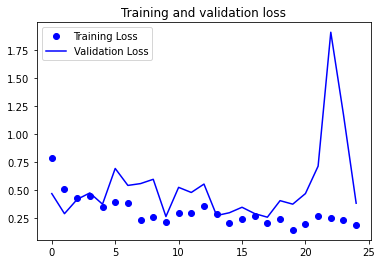

In [45]:
#Accuracy
acc = H.history['acc']
val_acc = H.history['val_acc']
loss = H.history['loss']
val_loss = H.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [46]:
#Print Classification Report
#Print the Target names

target_names = []

for key in train_generator.class_indices:
    target_names.append(key)
print(target_names)

['Normal', 'Tuberculosis']


In [47]:
from sklearn.metrics import classification_report
Y_pred = model.predict_generator(test_generator)
y_pred = np.argmax(Y_pred, axis=1)

print('Classification Report')
print(classification_report(test_generator.classes, y_pred, target_names=target_names))

C:\Users\ASUS RYZEN\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Classification Report
              precision    recall  f1-score   support

      Normal       0.84      0.82      0.83       350
Tuberculosis       0.19      0.21      0.20        70

    accuracy                           0.72       420
   macro avg       0.51      0.52      0.51       420
weighted avg       0.73      0.72      0.72       420



In [48]:
test_datagen = ImageDataGenerator()

test_generator  = test_datagen.flow_from_directory(test_dir,
                                          class_mode=None,
                                          shuffle=False,
                                          target_size=(150, 150))

Found 420 images belonging to 2 classes.


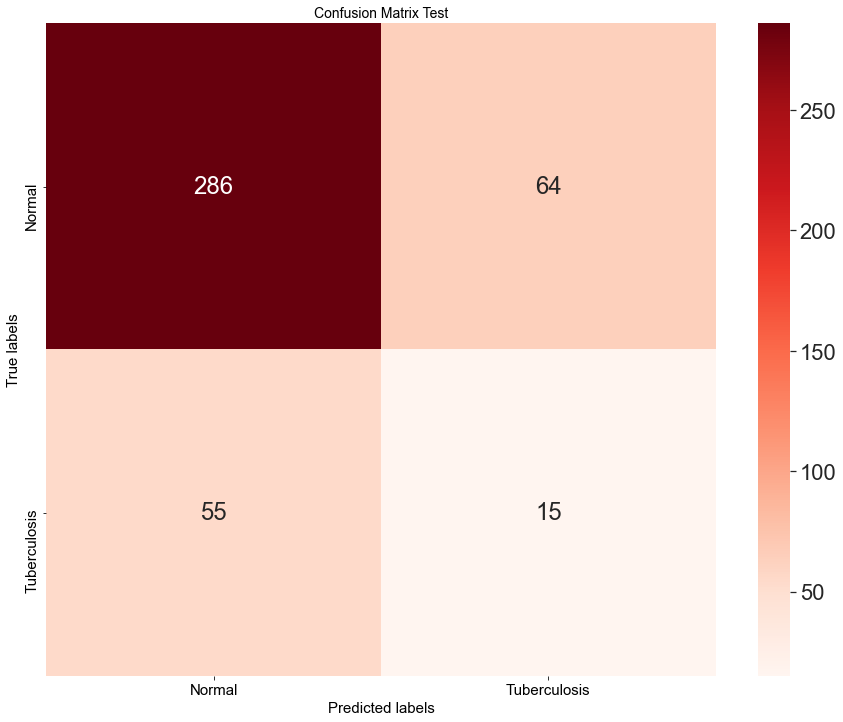

In [53]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
Cmatrix_test = confusion_matrix(test_generator.classes, y_pred)
class_names = test_generator.class_indices

plt.figure(figsize = (15,12))
ax = plt.subplot()
sns.set(font_scale=2.0) # Adjust to fit
sns.heatmap(Cmatrix_test,annot=True, fmt='',ax=ax, cmap=plt.cm.Reds)

# labels, title and ticks
label_font = {'size':'15'}  # Adjust to fit
ax.set_xlabel('Predicted labels', fontdict=label_font)
ax.set_ylabel('True labels', fontdict=label_font) 

title_font = {'size':'18'}  # Adjust to fit
ax.set_title('Confusion Matrix', fontdict=title_font)

ax.tick_params(axis='both', which='major', labelsize=15)  # Adjust to fit
ax.xaxis.set_ticklabels(class_names)   
ax.yaxis.set_ticklabels(class_names)
plt.title('Confusion Matrix Test',fontsize=14)
plt.show()

# Predict

In [60]:
import time
from tensorflow.keras.preprocessing.image import  load_img, img_to_array
def pred_img(img_path):
    img = load_img(img_path, target_size=(100,100))
    img = img_to_array(img)
    img = np.expand_dims(img, axis=0)

    start_pred_time = time.time()

    pred_result = model.predict(img)

    end_pred_time = time.time()

    pred_value = np.argmax(pred_result[0])
    # pred_label = list(label_dict.keys())[list(label_dict.values()).index(pred_value)]
    pred_label = 'Normal' if pred_value == 0 else 'Tuberculosis'
    confidence_percent = np.max(pred_result[0]) * 100
    pred_time = end_pred_time - start_pred_time

    return pred_label, confidence_percent, pred_time

In [61]:
#from random import shuffle
#test_dir = 'C:/Users/ASUS RYZEN/AnacondaJupyter/ML_Praktikum/Modul5/tuberculosis-tb-chest-xray-dataset/TB_Chest_Radiography_Database_splitted/test'
normal_files = os.listdir(test_normal_dir)
tuber_files = os.listdir(test_tuber_dir)

norm_name_dir = [os.path.join(test_normal_dir, fname) for fname in normal_files[:5]]
tuber_name_dir = [os.path.join(test_tuber_dir, fname) for fname in tuber_files[:5]]

norm_tuber_dir = norm_name_dir + tuber_name_dir

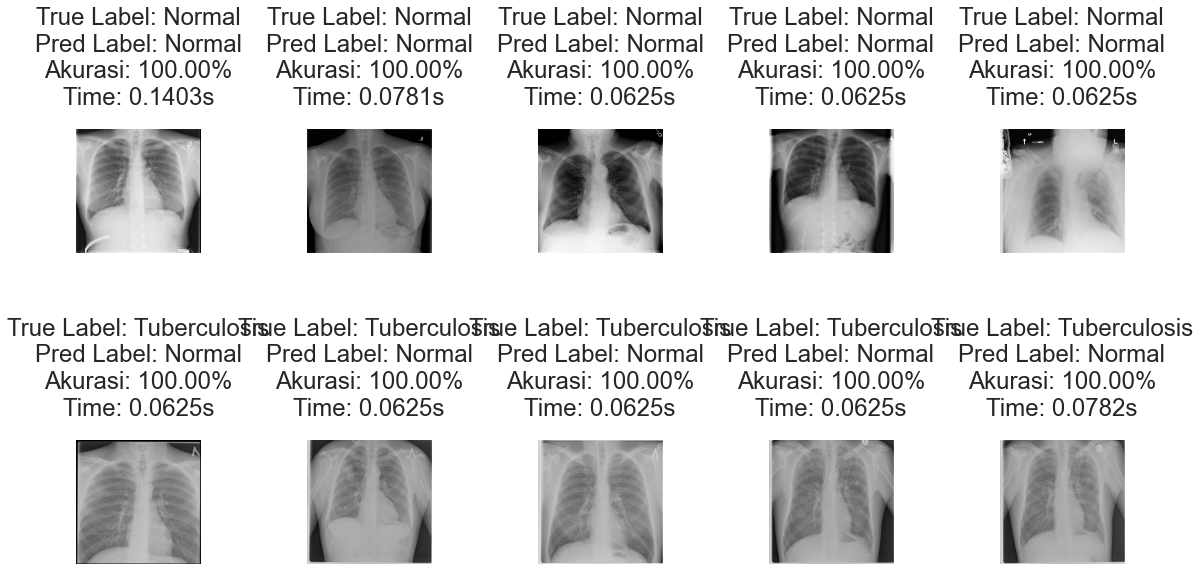

In [62]:
import matplotlib.pyplot as plt

nrows = 2
ncols = 5

fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

for i, img_path in enumerate(norm_tuber_dir):
    plt.subplot(nrows, ncols, i + 1)
    plt.subplots_adjust(hspace=1.5)

    img = cv2.imread(img_path)
    img = cv2.resize(img, (150,150))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    true_label = img_path.split(os.path.sep)[-2]
    pred_result = pred_img(img_path)
    pred_label = pred_result[0]
    confidence_percent = pred_result[1]
    pred_time = pred_result[2]

    plt.title(f"True Label: {true_label}\nPred Label: {pred_label}\nAkurasi: {confidence_percent:.2f}%\nTime: {pred_time:.4f}s", y=1.15)
    plt.grid(False)
    plt.axis(False)
    plt.imshow(img)

plt.show()